# Week 4 - WORKING WITH TIMESTAMPS - 30.01

## Project Challenges: 30.01

WORKING WITH TIMESTAMPS



Project Description

Examine whether the bicycle count shows any time-related patterns. Create a notebook in which you will solve the following questions:

In [261]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as sm
import scipy.stats as sps
from sklearn.cluster import KMeans

In [249]:
import statsmodels

In [262]:
#Extract features like hour, month, etc. from the datetime column into their own columns

bike_data = pd.read_csv('../data/dc_bikes.csv', parse_dates=True, index_col=0)

In [263]:
bike_data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1


In [264]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17379 entries, 2011-01-01 00:00:00 to 2012-12-31 23:00:00
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   holiday     17379 non-null  int64  
 2   workingday  17379 non-null  int64  
 3   weather     17379 non-null  int64  
 4   temp        17379 non-null  float64
 5   atemp       17379 non-null  float64
 6   humidity    17379 non-null  int64  
 7   windspeed   17379 non-null  float64
 8   casual      10886 non-null  float64
 9   registered  10886 non-null  float64
 10  count       17379 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 1.6 MB


In [257]:
bike_data.loc['2010-09-03':'2012-09-04']

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
2012-09-04 19:00:00,3,0,1,1,31.16,36.365,70,15.0013,50.0,502.0,552
2012-09-04 20:00:00,3,0,1,1,30.34,34.850,70,16.9979,47.0,338.0,385
2012-09-04 21:00:00,3,0,1,1,30.34,35.605,74,16.9979,28.0,240.0,268


In [272]:
bike_data['hour_of_day'] = bike_data.index.hour
bike_data.index.hour

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
            ...
            14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
           dtype='int64', name='datetime', length=17379)

In [273]:
bike_data

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour_of_day
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,156,19
2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,104,20
2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,67,21


In [274]:
bike_data['month'] = bike_data.index.month
bike_data.index.month

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='datetime', length=17379)

In [275]:
bike_data

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour_of_day,month
datetime,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16,0,1
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40,1,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32,2,1
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13,3,1
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,156,19,12
2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,104,20,12
2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,67,21,12


In [276]:
bike_data['year'] = bike_data.index.year
bike_data.index.year

Int64Index([2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011,
            ...
            2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012],
           dtype='int64', name='datetime', length=17379)

In [277]:
bike_data

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour_of_day,month,year
datetime,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16,0,1,2011
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40,1,1,2011
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32,2,1,2011
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13,3,1,2011
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1,4,1,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,156,19,12,2012
2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,104,20,12,2012
2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,67,21,12,2012


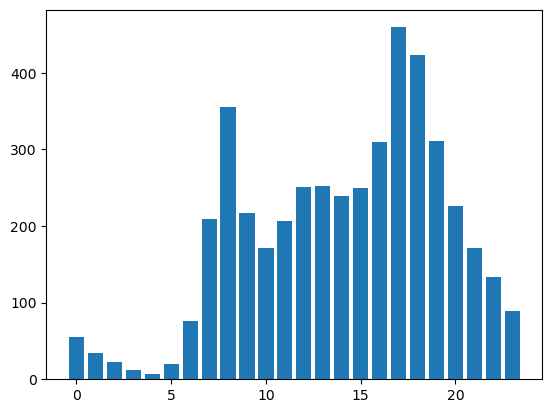

In [278]:
#Plot small sections of the count data over time (1 day, 1 week, etc.)

#sns.scatterplot(data = bike_data, x='count', y='count', hue='datetime', size='year')

#bike_data.groupby('hour_of_day').mean()['count'].plot(kind='bar').set_title('DC Bikes')

#bike_data.groupby(['hour_of_day', 'season']).mean()['count'].plot(kind='bar').set_title('DC Bikes')

#bike_data.groupby(['hour_of_day', 'season']).mean('count').unstack().plot(kind='bar',stacked=True).set_title('DC Bikes')
plt.show()

daily_av = bike_data.groupby('hour_of_day')['count'].mean()
plt.bar(daily_av.index, daily_av);


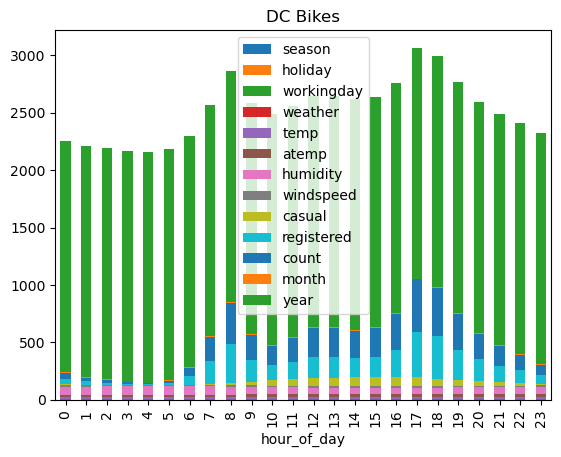

In [279]:
bike_data.groupby(['hour_of_day']).mean('count').plot(kind='bar',stacked=True).set_title('DC Bikes')
plt.show()

Text(0.5, 1.0, 'DC Bikes')

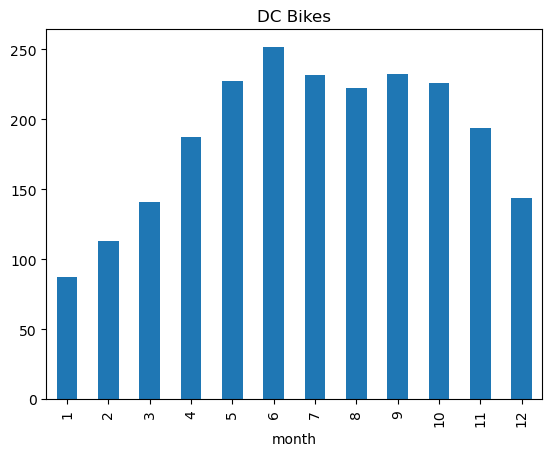

In [280]:
bike_data.groupby('month').mean()['count'].plot(kind='bar').set_title('DC Bikes')

Text(0.5, 1.0, 'DC Bikes')

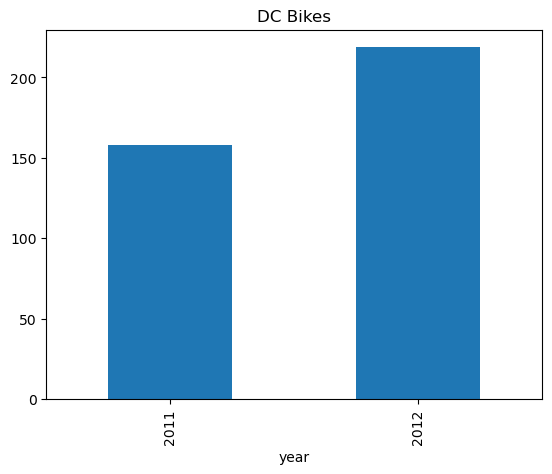

In [281]:
bike_data.groupby('year').mean()['count'].plot(kind='bar').set_title('DC Bikes')

Text(0.5, 1.0, 'DC Bikes')

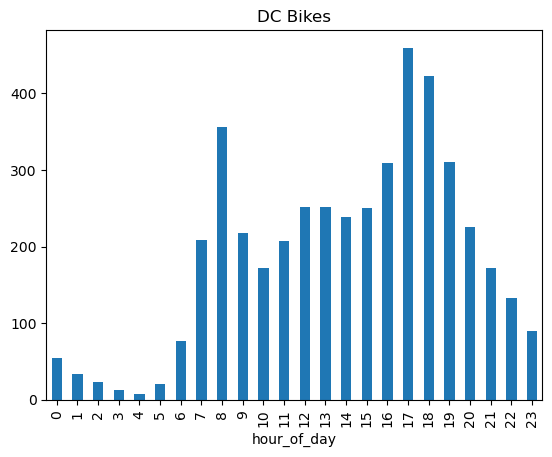

In [282]:

bike_data.groupby('hour_of_day').mean()['count'].plot(kind='bar').set_title('DC Bikes')


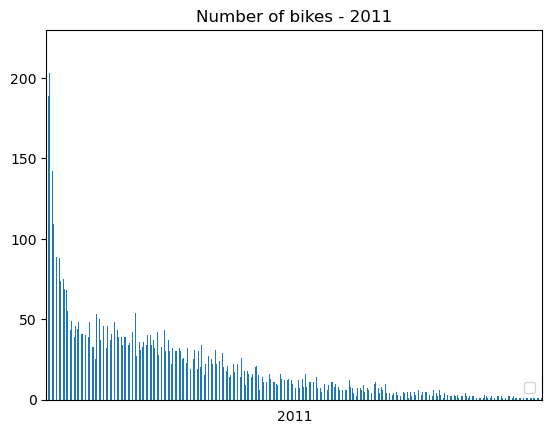

In [284]:
import matplotlib.pyplot as plt

# create dummy variable them group by that
# set the legend to false because we'll fix it later
bike_data.groupby(['count']).size().to_frame().unstack().plot(kind='bar',stacked=True,legend=False)

plt.title('Number of bikes - 2011')

# other it'll show up as 'dummy' 
plt.xlabel('2011')

# disable ticks in the x axis
plt.xticks([])

# fix the legend
current_handles, _ = plt.gca().get_legend_handles_labels()
reversed_handles = reversed(current_handles)

labels = reversed(bike_data['count'].unique())

plt.legend(reversed_handles,labels,loc='lower right')
plt.show()

In [333]:
#bike_data['day'] = bike_data['hour_of_day'].dt.weekday

In [288]:
#Create a part_of_day column for the bike data. It should have the following labels: 
#morning, afternoon, evening, night

bin_labels = ['morning', 'afternoon', 'evening', 'night']

In [289]:
bin_labels

['morning', 'afternoon', 'evening', 'night']

In [290]:
bin_boundaries = [-np.inf, 6.9, 12, 18, np.inf]

In [291]:
pd.cut(bike_data['hour_of_day'], bins=bin_boundaries, labels=bin_labels)

datetime
2011-01-01 00:00:00    morning
2011-01-01 01:00:00    morning
2011-01-01 02:00:00    morning
2011-01-01 03:00:00    morning
2011-01-01 04:00:00    morning
                        ...   
2012-12-31 19:00:00      night
2012-12-31 20:00:00      night
2012-12-31 21:00:00      night
2012-12-31 22:00:00      night
2012-12-31 23:00:00      night
Name: hour_of_day, Length: 17379, dtype: category
Categories (4, object): ['morning' < 'afternoon' < 'evening' < 'night']

In [292]:
bike_data['part_of_day'] = pd.cut(bike_data['hour_of_day'], bins=bin_boundaries, labels=bin_labels)

In [293]:
bike_data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour_of_day,month,year,part_of_day
datetime,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16,0,1,2011,morning
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40,1,1,2011,morning
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32,2,1,2011,morning
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13,3,1,2011,morning
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1,4,1,2011,morning


In [294]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17379 entries, 2011-01-01 00:00:00 to 2012-12-31 23:00:00
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   season       17379 non-null  int64   
 1   holiday      17379 non-null  int64   
 2   workingday   17379 non-null  int64   
 3   weather      17379 non-null  int64   
 4   temp         17379 non-null  float64 
 5   atemp        17379 non-null  float64 
 6   humidity     17379 non-null  int64   
 7   windspeed    17379 non-null  float64 
 8   casual       10886 non-null  float64 
 9   registered   10886 non-null  float64 
 10  count        17379 non-null  int64   
 11  hour_of_day  17379 non-null  int64   
 12  month        17379 non-null  int64   
 13  year         17379 non-null  int64   
 14  part_of_day  17379 non-null  category
dtypes: category(1), float64(5), int64(9)
memory usage: 2.0 MB


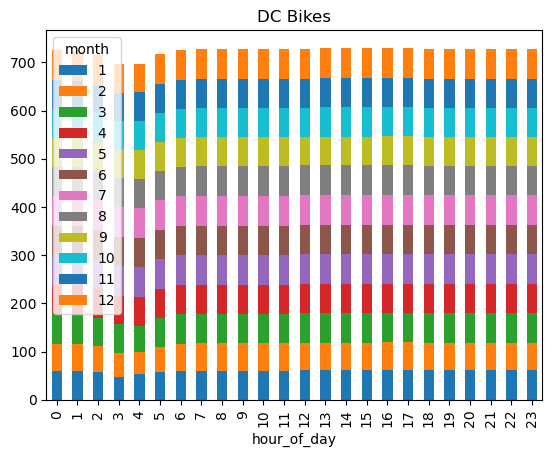

In [295]:
bike_data.groupby(['hour_of_day', 'month']).size().unstack().plot(kind='bar',stacked=True).set_title('DC Bikes')
plt.show()

In [296]:
bike_data.reset_index().to_csv('bikes_clean.csv', index=False)

In [297]:
#Save your new dataset in a csv file (so you can reuse it later on)